# General Dataset

In [1]:
from scipy.stats import ttest_rel
import numpy as np

# === STEP 1: Define your macro-F1 results for each model across 5 seeds ===
# Replace these with your actual 5-seed performance values (same order of seeds)

# BERTweet models
bertweet_sent_single = [0.3870, 0.3844, 0.3876, 0.3890, 0.3887]
bertweet_sent_multi  = [0.3838, 0.3838, 0.3856, 0.3888, 0.3824]

bertweet_emotion_single = [0.6846, 0.6781, 0.6903, 0.7011, 0.4431]
bertweet_emotion_multi  = [0.1018, 0.1074, 0.0940, 0.0999, 0.1237]

# DistilRoBERTa models
distil_sent_single = [0.3840, 0.3729, 0.3837, 0.3824, 0.3773] 
distil_sent_multi  = [0.3854, 0.3792, 0.3882, 0.3798, 0.3803]

distil_emotion_single = [0.6988, 0.7091, 0.7091, 0.7117, 0.7044]
distil_emotion_multi  = [0.1016, 0.0793, 0.0795, 0.1015, 0.1072]

# === STEP 2: Helper function to run t-test and print results ===
def run_ttest(model_name, task, single_scores, multi_scores):
    t_stat, p_value = ttest_rel(multi_scores, single_scores)
    print(f"\n📊 {model_name} - {task}")
    print(f"Mean (Single): {np.mean(single_scores):.4f}")
    print(f"Mean (Multi):  {np.mean(multi_scores):.4f}")
    print(f"T-statistic: {t_stat:.4f}")
    print(f"P-value:     {p_value:.4f}")
    if p_value < 0.05:
        print("✅ Statistically significant difference (p < 0.05)")
    else:
        print("❌ No statistically significant difference (p ≥ 0.05)")

# === STEP 3: Run t-tests for all comparisons ===
run_ttest("BERTweet", "Sentiment", bertweet_sent_single, bertweet_sent_multi)
run_ttest("BERTweet", "Emotion", bertweet_emotion_single, bertweet_emotion_multi)
run_ttest("DistilRoBERTa", "Sentiment", distil_sent_single, distil_sent_multi)
run_ttest("DistilRoBERTa", "Emotion", distil_emotion_single, distil_emotion_multi)



📊 BERTweet - Sentiment
Mean (Single): 0.3873
Mean (Multi):  0.3849
T-statistic: -2.2423
P-value:     0.0884
❌ No statistically significant difference (p ≥ 0.05)

📊 BERTweet - Emotion
Mean (Single): 0.6394
Mean (Multi):  0.1054
T-statistic: -9.9024
P-value:     0.0006
✅ Statistically significant difference (p < 0.05)

📊 DistilRoBERTa - Sentiment
Mean (Single): 0.3801
Mean (Multi):  0.3826
T-statistic: 1.6633
P-value:     0.1716
❌ No statistically significant difference (p ≥ 0.05)

📊 DistilRoBERTa - Emotion
Mean (Single): 0.7066
Mean (Multi):  0.0938
T-statistic: -83.9878
P-value:     0.0000
✅ Statistically significant difference (p < 0.05)


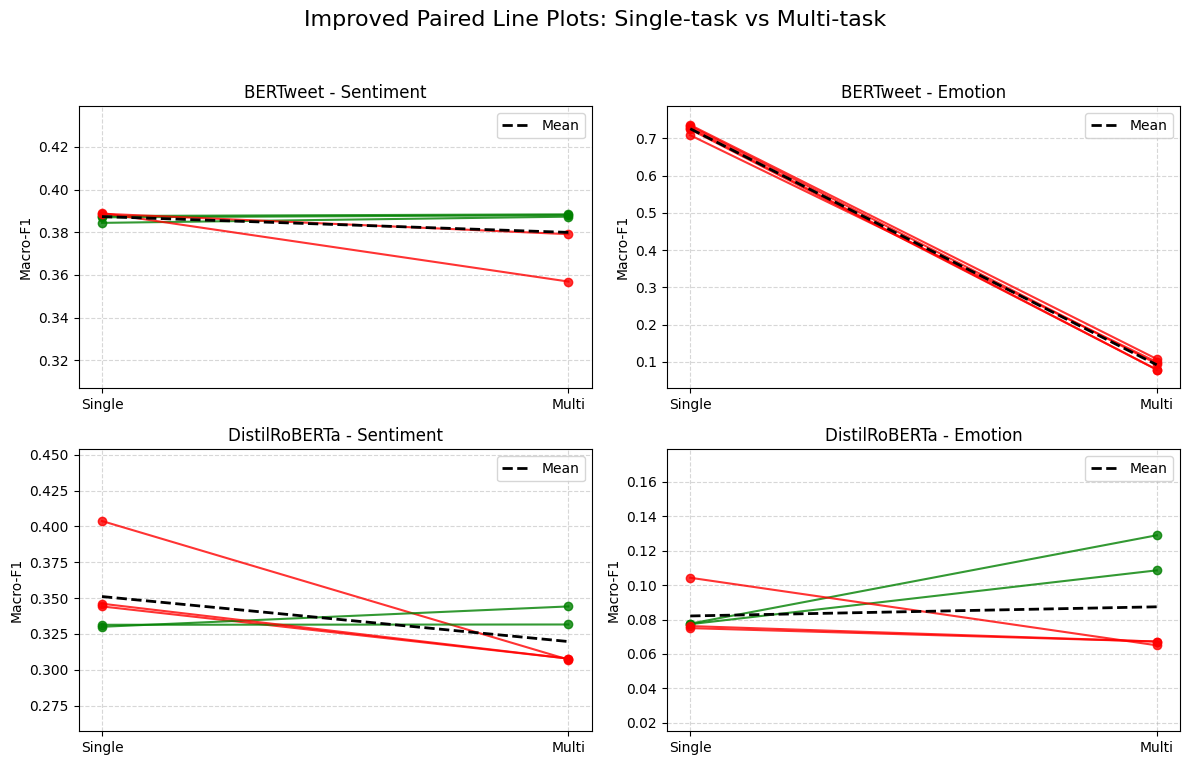

In [2]:
import matplotlib.pyplot as plt
import numpy as np

# Your actual values
results = {
    "BERTweet - Sentiment": {
        "Single": [0.3870, 0.3844, 0.3876, 0.3890, 0.3887],
        "Multi":  [0.3880, 0.3873, 0.3884, 0.3569, 0.3791]
    },
    "BERTweet - Emotion": {
        "Single": [0.7356, 0.7324, 0.7237, 0.7081, 0.7276],
        "Multi":  [0.1081, 0.0953, 0.0796, 0.0999, 0.0795]
    },
    "DistilRoBERTa - Sentiment": {
        "Single": [0.4038, 0.3442, 0.3300, 0.3314, 0.3461],
        "Multi":  [0.3071, 0.3078, 0.3442, 0.3316, 0.3078]
    },
    "DistilRoBERTa - Emotion": {
        "Single": [0.0776, 0.0773, 0.0750, 0.0762, 0.1043],
        "Multi":  [0.1290, 0.1086, 0.0672, 0.0672, 0.0650]
    }
}

fig, axes = plt.subplots(2, 2, figsize=(12, 8))
axes = axes.flatten()

for idx, (title, data) in enumerate(results.items()):
    ax = axes[idx]
    for i in range(len(data["Single"])):
        single = data["Single"][i]
        multi = data["Multi"][i]
        color = 'green' if multi > single else 'red'
        ax.plot(["Single", "Multi"], [single, multi], marker='o', color=color, alpha=0.8)
    
    # Add average line
    avg_single = np.mean(data["Single"])
    avg_multi = np.mean(data["Multi"])
    ax.plot(["Single", "Multi"], [avg_single, avg_multi],
            color='black', linestyle='--', linewidth=2, label='Mean')

    ax.set_title(title)
    ax.set_ylabel("Macro-F1")
    ax.set_ylim(min(min(data["Single"]), min(data["Multi"])) - 0.05, 
                max(max(data["Single"]), max(data["Multi"])) + 0.05)
    ax.legend()
    ax.grid(True, linestyle='--', alpha=0.5)

plt.suptitle("Improved Paired Line Plots: Single-task vs Multi-task", fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


# Reddit dataset

In [3]:
from scipy.stats import ttest_rel
import numpy as np

# === STEP 1: Define your macro-F1 results for each model across 5 seeds ===
# Replace these with your actual 5-seed performance values (same order of seeds)

# BERTweet models
bertweet_sent_single = [0.4038, 0.4073, 0.4123, 0.3846, 0.1725]
bertweet_sent_multi  = [0.4152, 0.3988, 0.2358, 0.3885, 0.3300]

bertweet_emotion_single = [0.0941, 0.0996, 0.0937, 0.0944, 0.1019]
bertweet_emotion_multi  = [0.1249, 0.0702, 0.0672, 0.0672, 0.1043]

# DistilRoBERTa models
distil_sent_single = [0.4038, 0.3442, 0.3300, 0.3314, 0.3461] 
distil_sent_multi  = [0.3071, 0.3078, 0.3442, 0.3316, 0.3078]

distil_emotion_single = [0.0776, 0.0773, 0.0750, 0.0762, 0.1043]
distil_emotion_multi  = [0.1290, 0.1086, 0.0672, 0.0672, 0.0650]

# === STEP 2: Helper function to run t-test and print results ===
def run_ttest(model_name, task, single_scores, multi_scores):
    t_stat, p_value = ttest_rel(multi_scores, single_scores)
    print(f"\n📊 {model_name} - {task}")
    print(f"Mean (Single): {np.mean(single_scores):.4f}")
    print(f"Mean (Multi):  {np.mean(multi_scores):.4f}")
    print(f"T-statistic: {t_stat:.4f}")
    print(f"P-value:     {p_value:.4f}")
    if p_value < 0.05:
        print("✅ Statistically significant difference (p < 0.05)")
    else:
        print("❌ No statistically significant difference (p ≥ 0.05)")

# === STEP 3: Run t-tests for all comparisons ===
run_ttest("BERTweet", "Sentiment", bertweet_sent_single, bertweet_sent_multi)
run_ttest("BERTweet", "Emotion", bertweet_emotion_single, bertweet_emotion_multi)
run_ttest("DistilRoBERTa", "Sentiment", distil_sent_single, distil_sent_multi)
run_ttest("DistilRoBERTa", "Emotion", distil_emotion_single, distil_emotion_multi)



📊 BERTweet - Sentiment
Mean (Single): 0.3561
Mean (Multi):  0.3537
T-statistic: -0.0461
P-value:     0.9655
❌ No statistically significant difference (p ≥ 0.05)

📊 BERTweet - Emotion
Mean (Single): 0.0967
Mean (Multi):  0.0868
T-statistic: -0.8491
P-value:     0.4436
❌ No statistically significant difference (p ≥ 0.05)

📊 DistilRoBERTa - Sentiment
Mean (Single): 0.3511
Mean (Multi):  0.3197
T-statistic: -1.6308
P-value:     0.1783
❌ No statistically significant difference (p ≥ 0.05)

📊 DistilRoBERTa - Emotion
Mean (Single): 0.0821
Mean (Multi):  0.0874
T-statistic: 0.3310
P-value:     0.7573
❌ No statistically significant difference (p ≥ 0.05)
